In [2]:
from dynamics import make_dynamic_curve
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style("whitegrid")

In [3]:
from coinbase_api import CoinbaseAPI

# make it as params of the script:
pair = 'XTZ-USD'
freq = 'H'

api = CoinbaseAPI()

dfs = {
    'H': api.get_history_prices(pair=pair, granularity=3600),
    '6H': api.get_history_prices(pair=pair, granularity=21600),
    'D': api.get_history_prices(pair=pair, granularity=86400),
}

In [4]:
curves = pd.DataFrame({
    freq: make_dynamic_curve(df, pair, freq, 0.1, num=21)
    for freq, df in dfs.items()
})

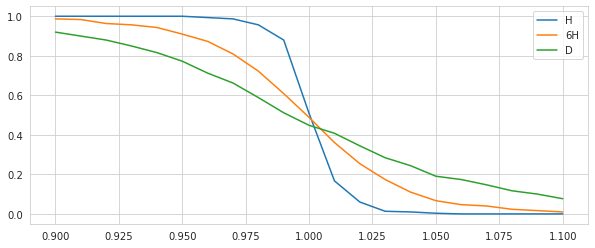

In [5]:
ax = curves.plot(figsize=(10, 4))
plt.savefig('dynamic_curve.png')

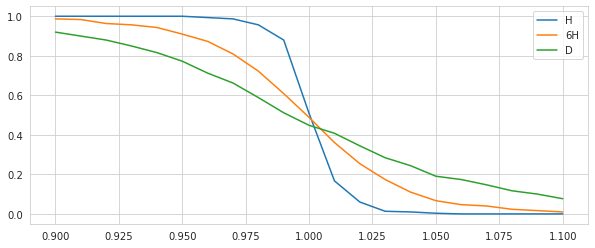

In [6]:
ax = curves.plot(figsize=(10, 4))
plt.savefig('dynamic_curve.png')

In [7]:
data = api.get_history_prices(pair=pair, granularity=60)

In [8]:
# row = data[ data.time == pd.to_datetime(1626094500, unit='s') ].iloc[0]
# (row.open + row.close)/2

In [9]:
# (row.open + row.close)/2

### Provide Liquidity pool sizes for Juster Maker:

In [13]:
from importlib import reload
import event_lines
reload(event_lines)

from event_lines import EventLines

In [14]:
lines = EventLines(api)

In [15]:
lines.generate_new()

[{'currency_pair': 'XTZ-USD',
  'target_dynamics': 1.0,
  'bets_period': 21600,
  'measure_period': 21600,
  'liquidity_percent': 0.01,
  'expiration_fee': 100000,
  'measure_start_fee': 100000,
  'pool_a_ratio': 488294,
  'pool_b_ratio': 511706},
 {'currency_pair': 'XTZ-USD',
  'target_dynamics': 1.0,
  'bets_period': 86400,
  'measure_period': 86400,
  'liquidity_percent': 0.01,
  'expiration_fee': 100000,
  'measure_start_fee': 100000,
  'pool_a_ratio': 448160,
  'pool_b_ratio': 551840},
 {'currency_pair': 'BTC-USD',
  'target_dynamics': 1.0,
  'bets_period': 21600,
  'measure_period': 21600,
  'liquidity_percent': 0.01,
  'expiration_fee': 100000,
  'measure_start_fee': 100000,
  'pool_a_ratio': 454849,
  'pool_b_ratio': 545151},
 {'currency_pair': 'BTC-USD',
  'target_dynamics': 1.0,
  'bets_period': 86400,
  'measure_period': 86400,
  'liquidity_percent': 0.01,
  'expiration_fee': 100000,
  'measure_start_fee': 100000,
  'pool_a_ratio': 471571,
  'pool_b_ratio': 528429},
 {'curre

In [16]:
lines.save('event_lines.json')

In [17]:
!cp event_lines.json ../../../juster-maker/event_lines.json

In [18]:
from dynamics import calc_rate_by_freq_and_target
calc_rate_by_freq_and_target(dfs['H'], freq='3600S', target_dynamics=1)

0.5083612040133779